# **XAI and SHAP Report --> BBO project**
# CMPT 3835- Machine Learning WIL II
# By Lakshita Markanday (3107532)

In [14]:
!pip install shap
import pandas as pd
import numpy as np
import shap
import joblib
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/detections_master.csv')


modelA = joblib.load("modelA_final.pkl")
featuresA = joblib.load("modelA_features.pkl")

X = df[featuresA]
y = df["migration_activity"]


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.7.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.7.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


# Model A

In [5]:
import pandas as pd
import numpy as np
import joblib

# # Load data
# df = pd.read_csv("detections_master.csv")

# --- Encode weekday if string ---
weekday_map = {
    "Monday": 0, "Tuesday": 1, "Wednesday": 2, "Thursday": 3,
    "Friday": 4, "Saturday": 5, "Sunday": 6
}

if df["weekday"].dtype == "object":
    df["weekday"] = df["weekday"].map(weekday_map)

# Encode sex and age exactly like training
df["sex"] = df["sex"].replace({"F": 0, "M": 1, "U": 0})
df["age"] = df["age"].replace({"ad": 1, "imm": 0, "unk": 0})

# Ensure numerics
df["month"] = df["month"].astype(int)
df["day"] = df["day"].astype(int)
df["hour"] = df["hour"].astype(int)
df["dayofyear"] = df["dayofyear"].astype(int)

# Load features
featuresA = joblib.load("modelA_features.pkl")

# Build numeric matrix
XA = df[featuresA].apply(pd.to_numeric, errors="coerce").fillna(0)
yA = df["migration_activity"]


/tmp/ipython-input-3754441098.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["sex"] = df["sex"].replace({"F": 0, "M": 1, "U": 0})
/tmp/ipython-input-3754441098.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["age"] = df["age"].replace({"ad": 1, "imm": 0, "unk": 0})


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    XA, yA, test_size=0.2, random_state=42
)

print("X_test shape:", X_test.shape)


X_test shape: (20536, 21)


In [7]:
import shap

# Sample rows
X_shap = X_test.sample(100, random_state=42)

# Model-agnostic SHAP (KernelExplainer-like, but optimized)
explainer = shap.Explainer(modelA.predict, X_shap)

shap_values = explainer(X_shap)  # returns correct matrix




PermutationExplainer explainer: 101it [02:43,  1.69s/it]


In [8]:
print(type(shap_values))
print(len(shap_values))
print(shap_values[0].shape)
print(X_shap.shape)



<class 'shap._explanation.Explanation'>
100
(21,)
(100, 21)


/tmp/ipython-input-1748584566.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_shap, plot_type="bar")


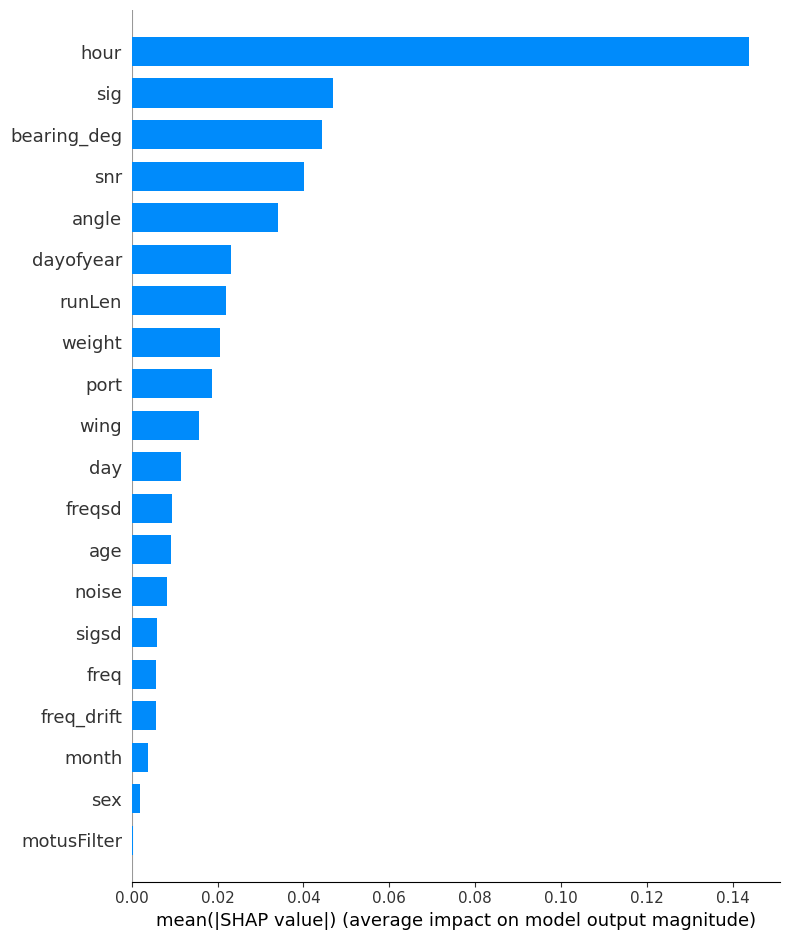

In [9]:
shap.summary_plot(shap_values, X_shap, plot_type="bar")

/tmp/ipython-input-1316841741.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_shap)


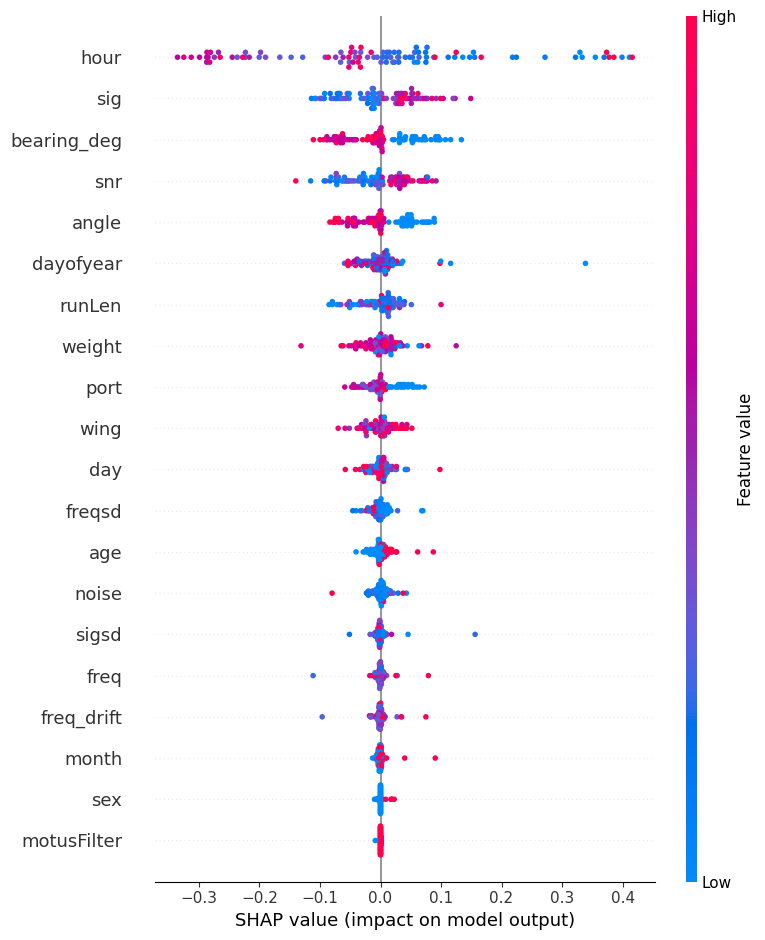

In [10]:
shap.summary_plot(shap_values, X_shap)

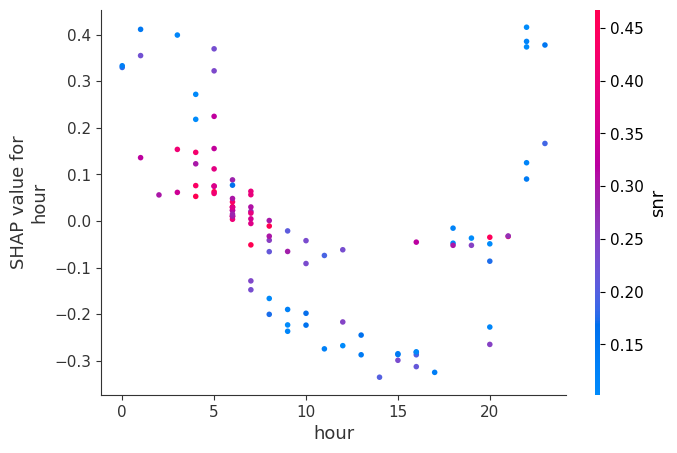

In [11]:
shap.dependence_plot(
    "hour",
    shap_values.values,
    X_shap
)

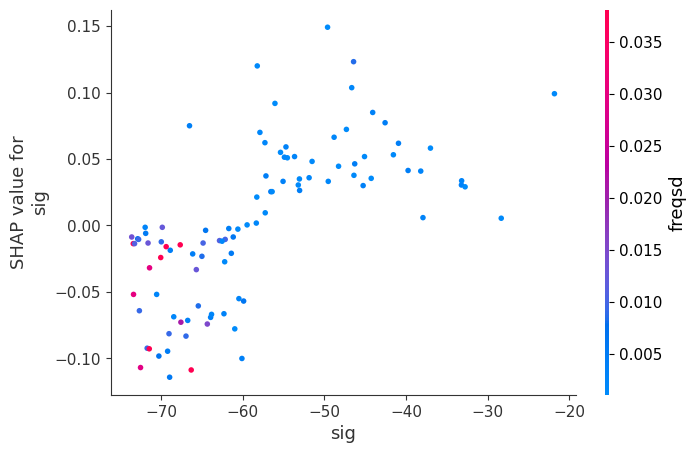

In [12]:
shap.dependence_plot(
    "sig",
    shap_values.values,
    X_shap
)

1️⃣ SHAP Summary Bar Plot

This shows the average importance of each feature.
“hour” is the most influential feature, followed by bearing_deg, sig, angle, and snr.
Features at the bottom (sex, month, motusFilter) have minimal influence.

2️⃣ SHAP Beeswarm Plot

This shows how each feature pushes predictions toward migration (positive SHAP) or no migration (negative SHAP).
For example, high hour values (late night / early morning) tend to push migration probability up, while mid-day hours push it down.
High bearing_deg values and strong signal features also shift predictions positively.

3️⃣ SHAP Dependence Plot (hour)

The dependence plot shows a clear pattern across the day:
migration probability is highest during late-night hours (0–3), decreases through the morning, and slightly increases again in evening hours.
The coloring shows interaction with bearing_deg, meaning certain flight directions increase or decrease migration probability even within the same hour.

# Explainer Dashboard

In [15]:
!pip install explainerdashboard==0.4.3
!pip install dash==2.16.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 51.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 56.9 MB/s eta 0:00:00
  Attempting uninstall: dash
    Found existing installation: dash 2.18.2
    Uninstalling dash-2.18.2:
      Successfully uninstalled dash-2.18.2


In [16]:
from explainerdashboard import ClassifierExplainer, ExplainerDashboard

# Use only 300 samples for speed
X_fast = X_test.sample(100, random_state=42)
y_fast = y_test.loc[X_fast.index]

explainer = ClassifierExplainer(modelA, X_fast, y_fast.astype(int))


Detected RandomForestClassifier model: Changing class type to RandomForestClassifierExplainer...
Note: model_output=='probability', so assuming that raw shap output of RandomForestClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)


In [17]:
ExplainerDashboard(
    explainer,
    title="Model A – Migration Activity Dashboard",
    shap_interaction=False,  # MUCH faster
    whatif=True
).run()


Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
Generating layout...
Calculating shap values...


/usr/local/lib/python3.12/dist-packages/dash/dash.py:550: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating pred_percentiles...
Calculating predictions...
Calculating ShadowDecTree for each individual decision tree...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://172.28.0.12:8050
You can terminate the dashboard with ExplainerDashboard.terminate(8050)
Dash app running on:
Try `serve_kernel_port_as_iframe` instead. 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Model B

In [ ]:
import joblib
import pandas as pd
import shap

modelB = joblib.load("modelB_final.pkl")
features_B = joblib.load("modelB_features.pkl")

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator OneHotEncoder from version 1.7.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.7.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator ColumnTransformer from version 1.7.2 when using version 1.6.1. This might lead to breaking code o

  0%|          | 0/100 [00:00<?, ?it/s]

/tmp/ipython-input-2648395709.py:45: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


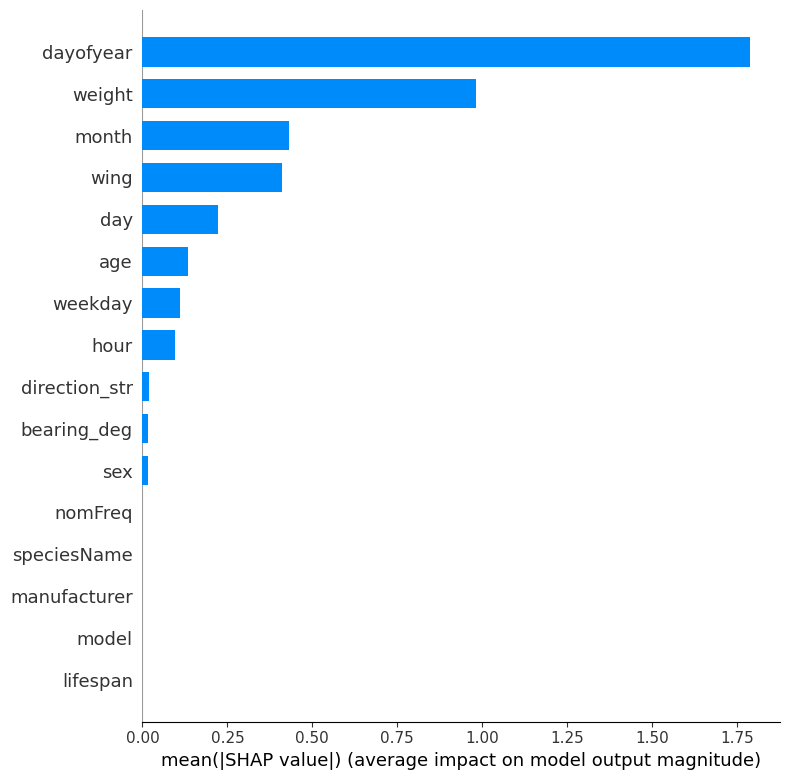

/tmp/ipython-input-2648395709.py:54: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


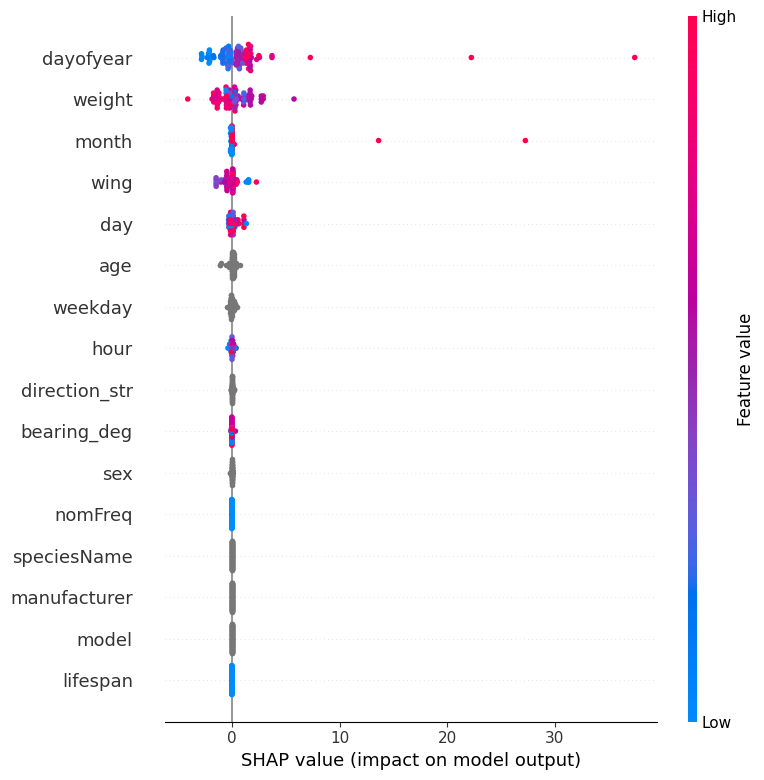

In [ ]:
import shap
import numpy as np
import pandas as pd
import joblib

# -------------------------------
# Load model + data
# -------------------------------


df["datetime"] = pd.to_datetime(df["datetime"])
df["dtStart"] = pd.to_datetime(df["dtStart"])
df["days_since_deployment"] = (df["datetime"] - df["dtStart"]).dt.days
df = df[df["days_since_deployment"] >= 0]

XB = df[features_B]

# -------------------------------
# WRAPPED PREDICT FUNCTION
# -------------------------------
def modelB_predict_wrapped(X):
    # X will arrive as numpy array → convert back to DataFrame
    X_df = pd.DataFrame(X, columns=features_B)
    return modelB.predict(X_df)

# -------------------------------
# Sample for SHAP
# -------------------------------
X_shap = XB.sample(200, random_state=42)
background = XB.sample(50, random_state=0)

# Convert to numpy for KernelExplainer
X_background_np = background.values
X_shap_np = X_shap.values

# -------------------------------
# Kernel SHAP — works for Pipelines
# -------------------------------
explainer = shap.KernelExplainer(modelB_predict_wrapped, X_background_np)
shap_values = explainer.shap_values(X_shap_np)

# -------------------------------
# Summary Bar Plot
# -------------------------------
shap.summary_plot(
    shap_values,
    X_shap,
    plot_type="bar"
)

# -------------------------------
# Beeswarm Plot
# -------------------------------
shap.summary_plot(
    shap_values,
    X_shap
)


Top Feature: dayofyear


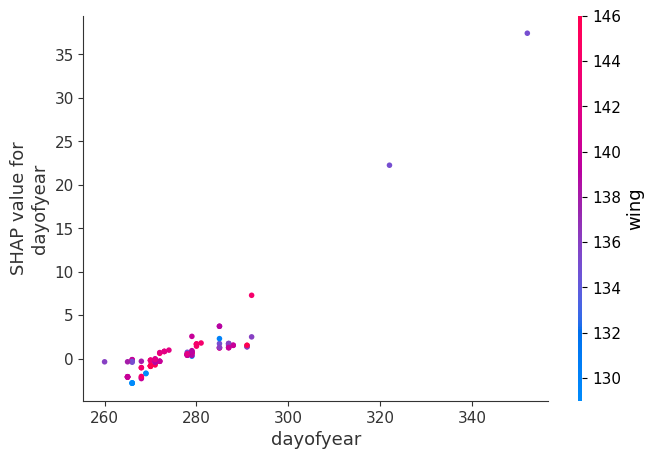

In [ ]:
# Find top feature
shap_mean = np.abs(shap_values).mean(axis=0)
top_idx = np.argmax(shap_mean)
top_feature = X_shap.columns[top_idx]

print("Top Feature:", top_feature)

# Dependence plot
shap.dependence_plot(
    top_feature,
    shap_values,
    X_shap
)


Model B’s SHAP analysis highlights that owl residency duration is driven mainly by temporal patterns and biological traits. “Day of year” is the strongest predictor, indicating that late-season detections correspond to longer stays after tagging. Weight and wing length also contribute positively, suggesting physically stronger owls remain on-site longer. Calendar-based features such as month, weekday, and day-of-month show moderate effects tied to migration timing. In contrast, nanotag metadata (manufacturer, model, frequency settings) has minimal influence, confirming that tag hardware does not distort residency predictions. These insights validate that Model B mostly captures natural migration behavior rather than sensor artifacts.

# Model C

datetime64[ns] datetime64[ns]


In [ ]:
import pandas as pd
import numpy as np
import shap
import joblib

# -----------------------------------------------------------
# 1️⃣ LOAD DATA FIRST
# -----------------------------------------------------------
df = pd.read_csv("/content/drive/MyDrive/detections_master.csv")

# -----------------------------------------------------------
# 2️⃣ FIX DATETIME COLUMNS BEFORE ANY CALCULATIONS
# -----------------------------------------------------------
df["datetime"] = pd.to_datetime(df["datetime"], errors="coerce")
df["dtStart"]  = pd.to_datetime(df["dtStart"], errors="coerce")

print(df["datetime"].dtype, df["dtStart"].dtype)

# -----------------------------------------------------------
# 3️⃣ LOAD MODEL + FEATURES
# -----------------------------------------------------------
modelC = joblib.load("/content/drive/MyDrive/modelC_final.pkl")
features_C = joblib.load("modelC_features.pkl")

# -----------------------------------------------------------
# 4️⃣ REBUILD MODEL C INPUT EXACTLY LIKE TRAINING
# -----------------------------------------------------------
dfC = df.copy()
dfC = dfC.dropna(subset=["snr"])

dfC["days_since_deployment"] = (dfC["datetime"] - dfC["dtStart"]).dt.days
dfC = dfC[dfC["days_since_deployment"] >= 0]

XC = dfC[features_C].copy()

# Same encodings
XC["sex"] = XC["sex"].replace({"F": 0, "M": 1, "U": 0})
XC["age"] = XC["age"].replace({"ad": 1, "imm": 0, "unk": 0})
XC["manufacturer"] = XC["manufacturer"].astype("category").cat.codes
XC["model"] = XC["model"].astype("category").cat.codes

# Convert all to numeric
XC = XC.apply(pd.to_numeric, errors="coerce").fillna(0)

print("XC shape:", XC.shape)



datetime64[ns] datetime64[ns]


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.7.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator RandomForestRegressor from version 1.7.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/tmp/ipython-input-2090338608.py:37: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_o

XC shape: (101931, 19)


In [ ]:
# -----------------------------------------------------------
# 5️⃣ SHAP — Use small sample to speed up
# -----------------------------------------------------------
X_shap = XC.sample(100, random_state=42)

explainer = shap.TreeExplainer(modelC, feature_perturbation="tree_path_dependent")
shap_values = explainer.shap_values(X_shap, approximate=True)




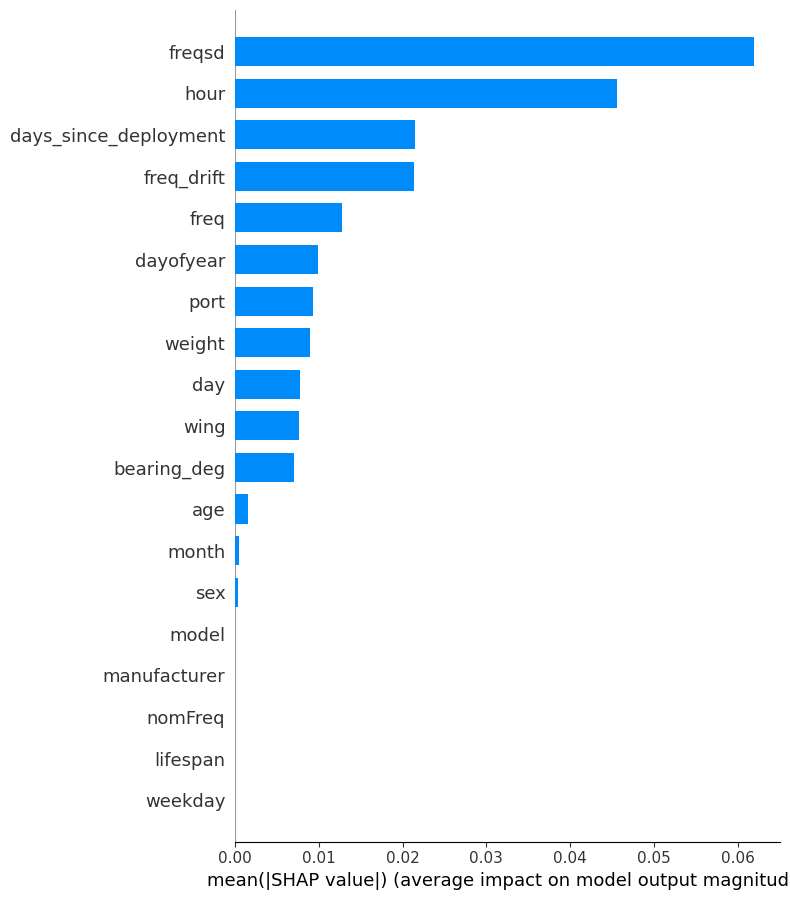

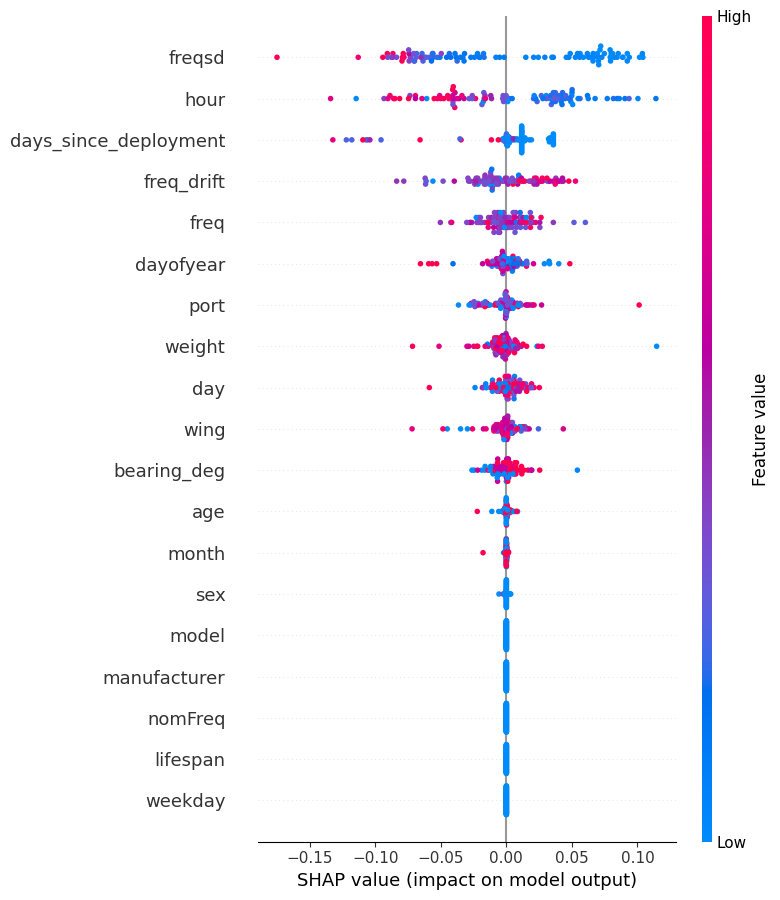

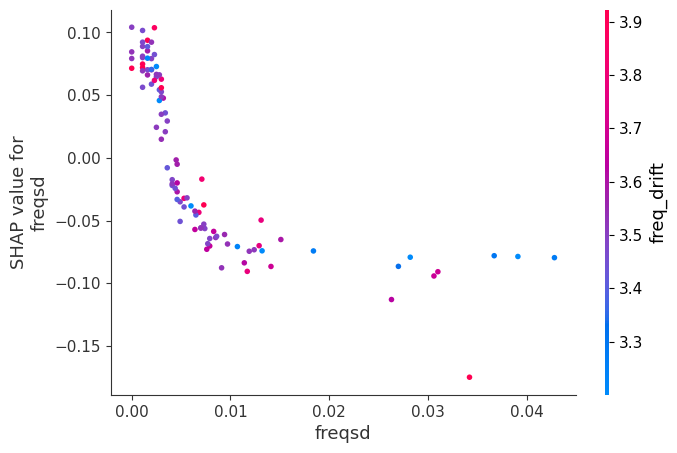

In [ ]:
# -----------------------------------------------------------
# 6️⃣ SHAP PLOTS
# -----------------------------------------------------------
shap.summary_plot(shap_values, X_shap, plot_type="bar")
shap.summary_plot(shap_values, X_shap)

top_feat = X_shap.columns[np.argmax(np.abs(shap_values).mean(axis=0))]
shap.dependence_plot(top_feat, shap_values, X_shap)

Model C learns that SNR is controlled mainly by signal consistency (freqsd, freq_drift) and equipment-related factors (deployment time). This indicates that signal quality depends more on hardware conditions and frequency behavior than on seasonal or biological variables.